#### @ Author 3x Group
Decision Tree Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| Decision tree with all the data |	83.96% | 0.64 | 0.313 |	
| Random forest with all the data | 87% | 0.58 | 0.245 |	
| Decision tree with variables selected from backward elimination  | 83.96% | 0.64 | 0.31 |	
| Decision tree with variables selected from cfs subset eval  | 84.23% | 0.61 | 0.25 |
| Random forest with variables selected from cfs subset eval  | 87.77% | 0.61 | 0.25 |

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
import numpy as np
import time
import sklearn
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import os     
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
%matplotlib inline
r_state=52
import warnings
warnings.filterwarnings('ignore')
print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================


C:\Users\moham\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data Shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


### Checking if startified sampling works

In [4]:
df['Attrition'].value_counts()/df.shape[0]*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [5]:
train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.75,stratify=df['Attrition'])

In [6]:
train['Attrition'].value_counts()/train.shape[0]*100

0    83.84755
1    16.15245
Name: Attrition, dtype: float64

In [7]:
test['Attrition'].value_counts()/test.shape[0]*100

0    83.967391
1    16.032609
Name: Attrition, dtype: float64

### Perfect!!!!!!!!!!!!!!!!

In [8]:
X = df.drop(df.columns[1], axis = 1) # drop the last column
y = df['Attrition'] # drop all the columns but the

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=r_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(x_train.shape[0]))
print("There are {} samples in the testing dataset".format(x_test.shape[0]))
print("Each sample has {} features".format(x_train.shape[1]))

There are 1102 samples in the training dataset
There are 368 samples in the testing dataset
Each sample has 50 features


In [10]:
y_train = y_train.values
y_test = y_test.values

#### Ok so now let us begin with creation of decision trees , lets visualize the tree and find the best parameter for our tree

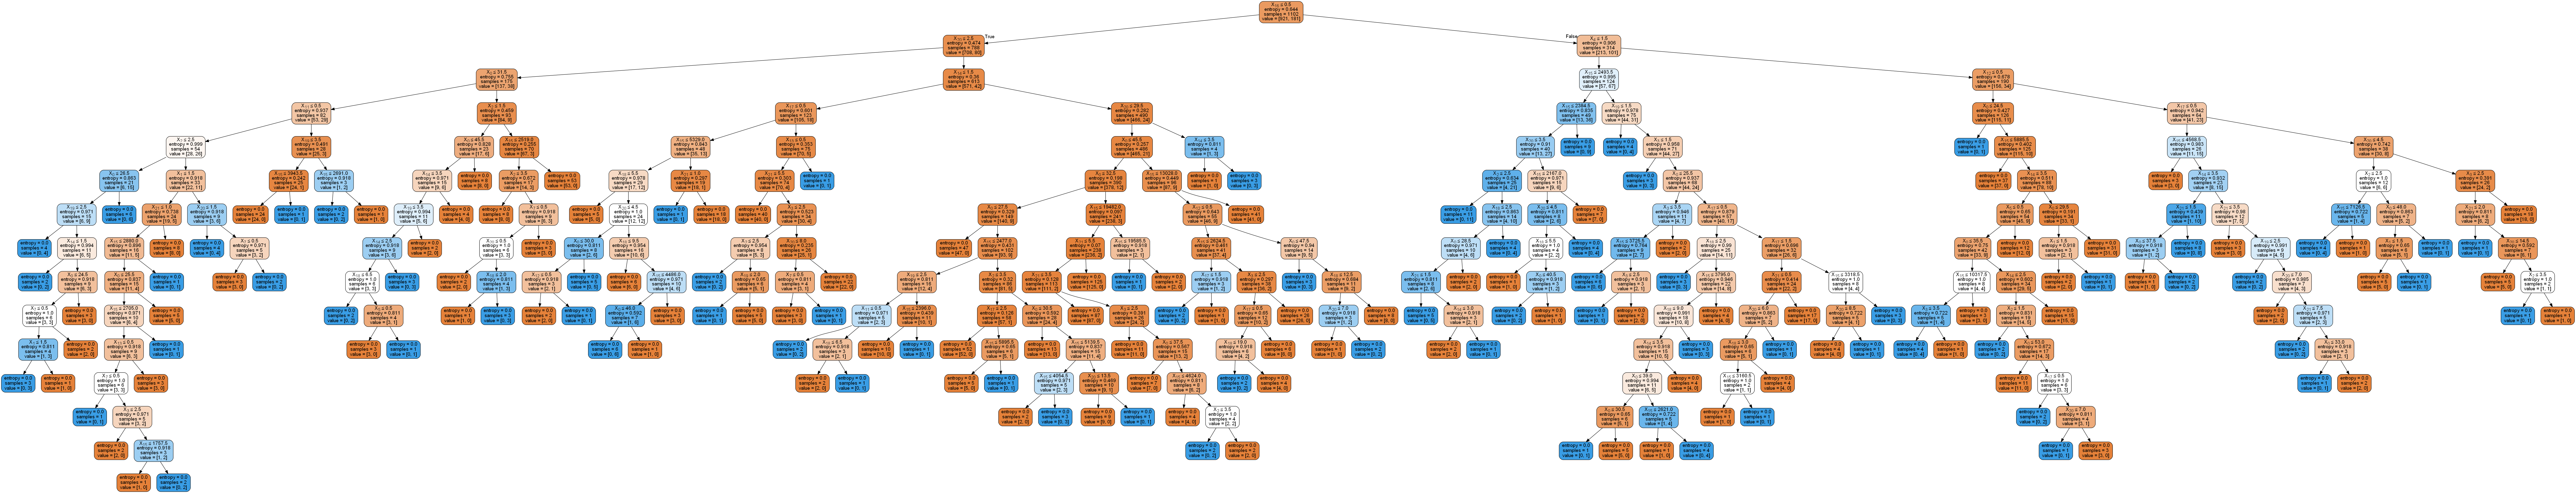

In [40]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state)
estimator.fit(x_train, y_train)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [12]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,1, 0.1)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = mid)
    scores = cross_val_score(estimator, x_train, y_train, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))
print(avg_scores)

[0.7813474025974025, 0.835762987012987, 0.835762987012987, 0.835762987012987, 0.835762987012987, 0.835762987012987, 0.835762987012987, 0.835762987012987, 0.835762987012987, 0.835762987012987]


The top accuracy forecast with cross validation is 83.6%
Obtained with min_impurity_decrease = 0.1


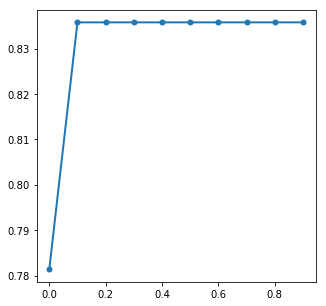

In [13]:
plt.figure(figsize=(5,5))
plt.plot(parameter_values, avg_scores, '-o', linewidth=2, markersize=5)
print("The top accuracy forecast with cross validation is {0:.1f}%".format(avg_scores[np.argmax(avg_scores)]*100))
print("Obtained with min_impurity_decrease = {0:.1f}".format(parameter_values[np.argmax(avg_scores)]))

In [14]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state,
                                        min_impurity_decrease = 0.1)

In [15]:
estimator.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=52,
            splitter='best')

In [16]:
estimator.score(x_test,y_test)

0.8478260869565217

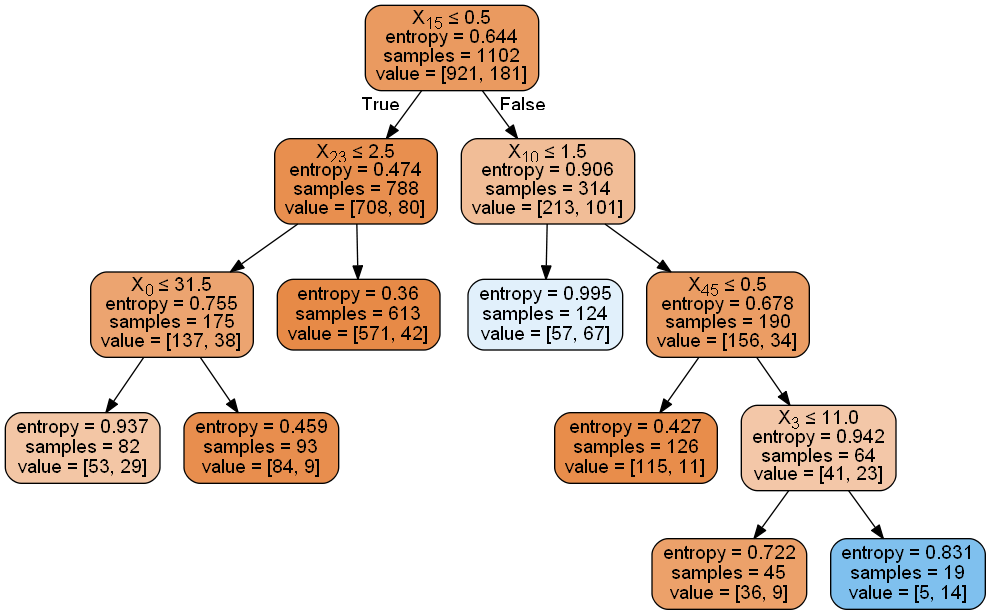

In [17]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = 0.01)
estimator.fit(x_train, y_train)
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
y_predicted = estimator.predict(x_train)
accuracy_full = np.mean( y_train== y_predicted) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The accuracy on full training set is 85.3%


In [19]:
model=estimator
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          289  36
1           23  20
             precision    recall  f1-score   support

          0       0.89      0.93      0.91       312
          1       0.47      0.36      0.40        56

avg / total       0.82      0.84      0.83       368

0.8396739130434783
Duration: --- 0.4068341374397278 Minutes ---


ROC AUC: 0.64


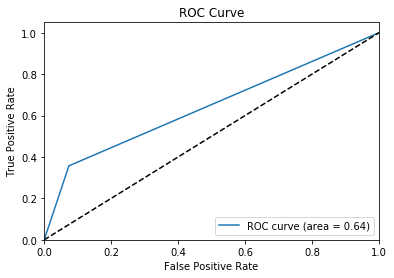

In [20]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.31325910931174095

##### Now that we have our parameters lets try various other combinations

### Lets try Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(max_depth=10,n_estimators=250,oob_score=True,min_samples_split=5,random_state=r_state,
                             min_samples_leaf=2)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=True, random_state=52, verbose=0, warm_start=False)

In [23]:
model.score(x_test,y_test)

0.8722826086956522

In [24]:
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          312  47
1            0   9
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       312
          1       1.00      0.16      0.28        56

avg / total       0.89      0.87      0.83       368

0.8722826086956522
Duration: --- 0.4315449873606364 Minutes ---


ROC AUC: 0.58


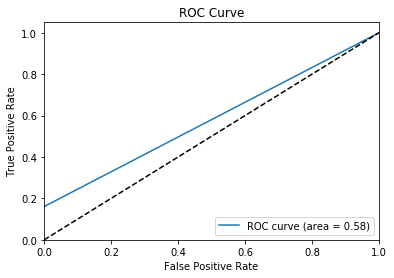

In [25]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.24511173184357538

### Clearly Random Forest seems like the winner here (Ensemble of tree)

#### Based on feature selection part Backward elimination from SAS
###### Not using gender due to GDPR

In [27]:
ndf=df
df=df[["Attrition","BusinessTravel","EducationField_Human Resources","EducationField_Life Sciences","EducationField_Marketing",
      "EducationField_Medical","EducationField_Other","EducationField_Technical Degree","EnvironmentSatisfaction",
      "JobInvolvement","JobLevel","JobRole_Healthcare Representative","JobRole_Human Resources","JobRole_Laboratory Technician",
      "JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director","JobRole_Research Scientist",
       "JobRole_Sales Executive","JobRole_Sales Representative","OverTime","RelationshipSatisfaction","StockOptionLevel",
      "WorkLifeBalance","Age","DistanceFromHome","NumCompaniesWorked","TotalWorkingYears","MonthlyIncome"]]

In [28]:
df.head()

,Attrition,BusinessTravel,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Age,DistanceFromHome,NumCompaniesWorked,TotalWorkingYears,MonthlyIncome
0,1,1,0,1,0,0,0,0,2,3,2,0,0,0,0,0,0,0,1,0,1,1,0,1,41,1,8,8,5993
1,0,2,0,1,0,0,0,0,3,2,2,0,0,0,0,0,0,1,0,0,0,4,1,3,49,8,1,10,5130
2,1,1,0,0,0,0,1,0,4,2,1,0,0,1,0,0,0,0,0,0,1,2,0,3,37,2,6,7,2090
3,0,2,0,1,0,0,0,0,4,3,1,0,0,0,0,0,0,1,0,0,1,3,0,3,33,3,1,8,2909
4,0,1,0,0,0,1,0,0,1,3,1,0,0,1,0,0,0,0,0,0,0,4,1,3,27,2,9,6,3468


In [29]:
X = df.drop(df.columns[0], axis = 1) # drop the last column
y = df['Attrition'] # drop all the columns but the
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=r_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(x_train.shape[0]))
print("There are {} samples in the testing dataset".format(x_test.shape[0]))
print("Each sample has {} features".format(x_train.shape[1]))
y_train = y_train.values
y_test = y_test.values

There are 1102 samples in the training dataset
There are 368 samples in the testing dataset
Each sample has 28 features


In [30]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = 0.01)
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=52,
            splitter='best')

The accuracy on full training set is 85.3%
True         0   1
Predicted         
0          289  36
1           23  20
             precision    recall  f1-score   support

          0       0.89      0.93      0.91       312
          1       0.47      0.36      0.40        56

avg / total       0.82      0.84      0.83       368

0.8396739130434783
ROC AUC: 0.64


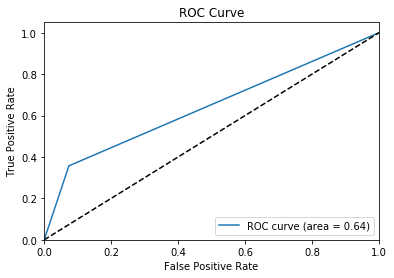

Kappa score is :0.31325910931174095


In [31]:
y_predicted = estimator.predict(x_train)
accuracy_full = np.mean( y_train== y_predicted) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))
model=estimator
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

#### Based on CFS subset eval done in weka

In [32]:
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df=df[["Attrition","Age","BusinessTravel","EnvironmentSatisfaction","JobInvolvement","JobLevel","JobRole_Healthcare Representative","JobRole_Human Resources","JobRole_Laboratory Technician",
      "JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director","JobRole_Research Scientist",
       "JobRole_Sales Executive","JobRole_Sales Representative","JobSatisfaction","MonthlyIncome","OverTime","StockOptionLevel",
       "TotalWorkingYears","WorkLifeBalance","YearsAtCompany","YearsWithCurrManager"]]

In [33]:
df.head()

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager
0,1,41,1,2,3,2,0,0,0,0,0,0,0,1,0,4,5993,1,0,8,1,6,5
1,0,49,2,3,2,2,0,0,0,0,0,0,1,0,0,2,5130,0,1,10,3,10,7
2,1,37,1,4,2,1,0,0,1,0,0,0,0,0,0,3,2090,1,0,7,3,0,0
3,0,33,2,4,3,1,0,0,0,0,0,0,1,0,0,3,2909,1,0,8,3,8,0
4,0,27,1,1,3,1,0,0,1,0,0,0,0,0,0,2,3468,0,1,6,3,2,2


In [34]:
X = df.drop(df.columns[0], axis = 1) # drop the last column
y = df['Attrition'] # drop all the columns but the
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=r_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(x_train.shape[0]))
print("There are {} samples in the testing dataset".format(x_test.shape[0]))
print("Each sample has {} features".format(x_train.shape[1]))
y_train = y_train.values
y_test = y_test.values

There are 1102 samples in the training dataset
There are 368 samples in the testing dataset
Each sample has 22 features


In [35]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = 0.01)
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=52,
            splitter='best')

The accuracy on full training set is 84.5%
True         0   1
Predicted         
0          295  41
1           17  15
             precision    recall  f1-score   support

          0       0.88      0.95      0.91       312
          1       0.47      0.27      0.34        56

avg / total       0.82      0.84      0.82       368

0.842391304347826
ROC AUC: 0.61


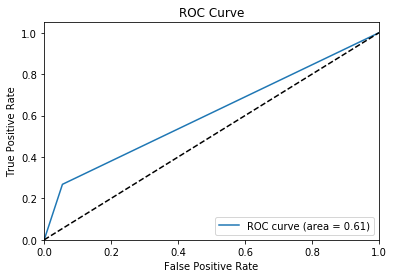

Kappa score is :0.25888888888888884


In [36]:
y_predicted = estimator.predict(x_train)
accuracy_full = np.mean( y_train== y_predicted) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))
model=estimator
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

#### Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(max_depth=10,n_estimators=250,oob_score=True,min_samples_split=5,random_state=r_state,
                             min_samples_leaf=2)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=True, random_state=52, verbose=0, warm_start=False)

In [38]:
model.score(x_test,y_test)

0.8777173913043478

ROC AUC: 0.61


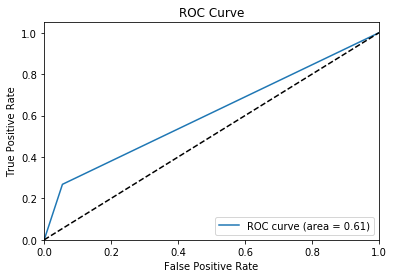

Kappa score is :0.25888888888888884


In [39]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))